# Stochastic Ascent for Bring Home Water
This small notebook shows how to run and visualize the results of running the stochastic ascent as explained by [D. Sels](https://arxiv.org/abs/1709.08766) on the Bring Home Water problem.


In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import sa 


## Parameters to play with
Below i have listed the parameters to play with
- T is duration to consider
- N is number of steps to do
- tweezer_grid_size is the the number of positions allowed for the controllable tweezer
- hamiltonian_grid_size: the size of the grid used to discretize the hamiltonian operator - large means more accurate but slower algorithm
- A amplitude of controllable tweezer
- B amplitude of fixed tweezer
- fix_start - fix first position of protocol to stay at -L/2
- superposition - try to move atom to superposition

We have fixed some standard value below and run the stochastic ascent algorithm that prints out what it is doing.
We have on purpose used smaller hamiltonian_grid_size compared to the experiments in the note because it speeds everything up and works well enough.
In the follwing cell we run the stochastic ascent algorithm with these parameters. 

In [36]:
T = 0.1
N = 40
tweezer_grid_size = 128
hamiltonian_grid_size = 128
A = 160
B = 130
fix_start = True
superposition = None
params = {'T': T, 'N': N, 'tweezer_grid_size': tweezer_grid_size, 'hamiltonian_grid_size': hamiltonian_grid_size, 
          'Alpha': A, 'Beta': B, 'fix_start': fix_start, 'superposition': superposition}


In [37]:
Q, best_score, protocol, path, all_fid  = sa.run(params, False, None)

Run {'T': 0.1, 'N': 40, 'tweezer_grid_size': 128, 'hamiltonian_grid_size': 128, 'Alpha': 160, 'Beta': 130, 'fix_start': True, 'superposition': None}
Time Per Step is: 0.0025
Make hamiltonians - grid size, Alpha:  128 160
Make T matrix for finite difference approximation of p^2: -1 2 -1: Tridiagonal matrix
T Scale: 0.5 / h^2 2016.1250000000002
Make B Matrix exp(-(x - start_state)^2/(2std^2)))
hamiltonians done
Made 128 Hamiltonians
Compute start state vector -  H=p^2/2m - 130 exp(-(x-x_start)^2/2\sigma).
finding smallest eigenvalue (128, 128)
largest eigenvalue 8061.952844798912
Smallest eigenvalues  -90.46769215882159
start_state norm 1.0000000000000002 complex128
Compute target state vector - H=p^2/2m-130 exp(-(x-x_end)^2/2\sigma).
finding smallest eigenvalue (128, 128)
largest eigenvalue 8061.952844798912
Smallest eigenvalues  -90.46769215882796
target_state norm 0.9999999999999999
compute unitaries by eigendecomposition of tridiagoanal matrices


/Users/jallan/mypython/qp/sa.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.vdot(cvec, cvec).astype('float64')


Time to make unitaries eig 0.2916688919067383
unitary dtype complex128
set starting value to something 28 -0.5590551181102362
Start Fidelity: 3.154764195546158e-05
time per epoch 0.4326012134552002
New fidelity: 0.10664775711691922 - improvement 0.10661620947496368
time per epoch 0.42451906204223633
New fidelity: 0.4125584952005502 - improvement 0.30591073808363095
time per epoch 0.429095983505249
New fidelity: 0.47278914972895214 - improvement 0.06023065452840237
time per epoch 0.4218580722808838
New fidelity: 0.48394438578467036 - improvement 0.011155236055717554
time per epoch 0.42889904975891113
New fidelity: 0.4862715535864107 - improvement 0.002327167801740415
time per epoch 0.41877293586730957
New fidelity: 0.4870164440274147 - improvement 0.0007448904410042312
time per epoch 0.4156489372253418
New fidelity: 0.4873920369915727 - improvement 0.0003755929641583444
time per epoch 0.43913912773132324
New fidelity: 0.4874792838604908 - improvement 8.724686891820044e-05
time per epoch

## Visualizing Protocol and the state of the atom
Below we show the protocol found by the algorithm above and a somewhat crude visualization of how that moves the atom.

Achieved fidelity 0.4880548466779189 in 12 iterations
The final protocol: 
[37 37 38 39 40 42 43 45 46 47 48 49 53 66 53 59 57 58 69 57 68 68 70 72
 74 76 77 79 81 82 84 85 86 87 88 88 89 89 90 28]
The cost after each iteration
[3.154764195546158e-05, 0.10664775711691922, 0.4125584952005502, 0.47278914972895214, 0.48394438578467036, 0.4862715535864107, 0.4870164440274147, 0.4873920369915727, 0.4874792838604908, 0.48803009840799616, 0.4880548466779187, 0.4880548466779187]
actual protocol [-0.55905512  0.41732283  0.4015748   0.4015748   0.38582677  0.38582677
  0.37007874  0.35433071  0.33858268  0.32283465  0.29133858  0.27559055
  0.24409449  0.21259843  0.19685039  0.16535433  0.13385827  0.1023622
  0.07086614  0.07086614 -0.1023622   0.08661417 -0.08661417 -0.1023622
 -0.07086614 -0.16535433  0.03937008 -0.16535433 -0.22834646 -0.24409449
 -0.25984252 -0.27559055 -0.29133858 -0.32283465 -0.33858268 -0.37007874
 -0.38582677 -0.4015748  -0.41732283 -0.41732283]


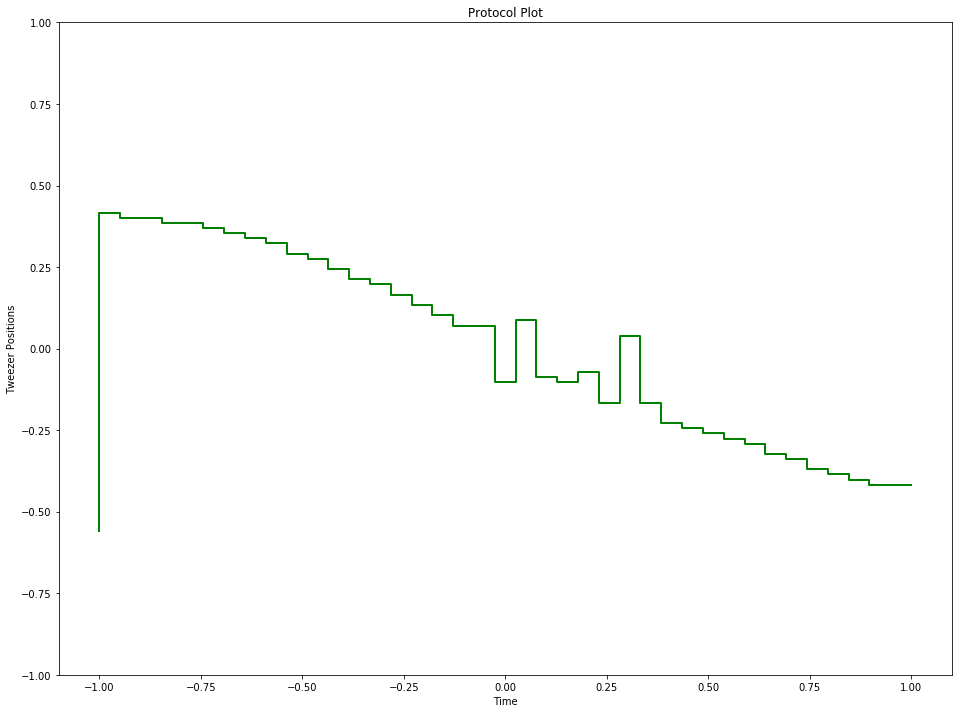

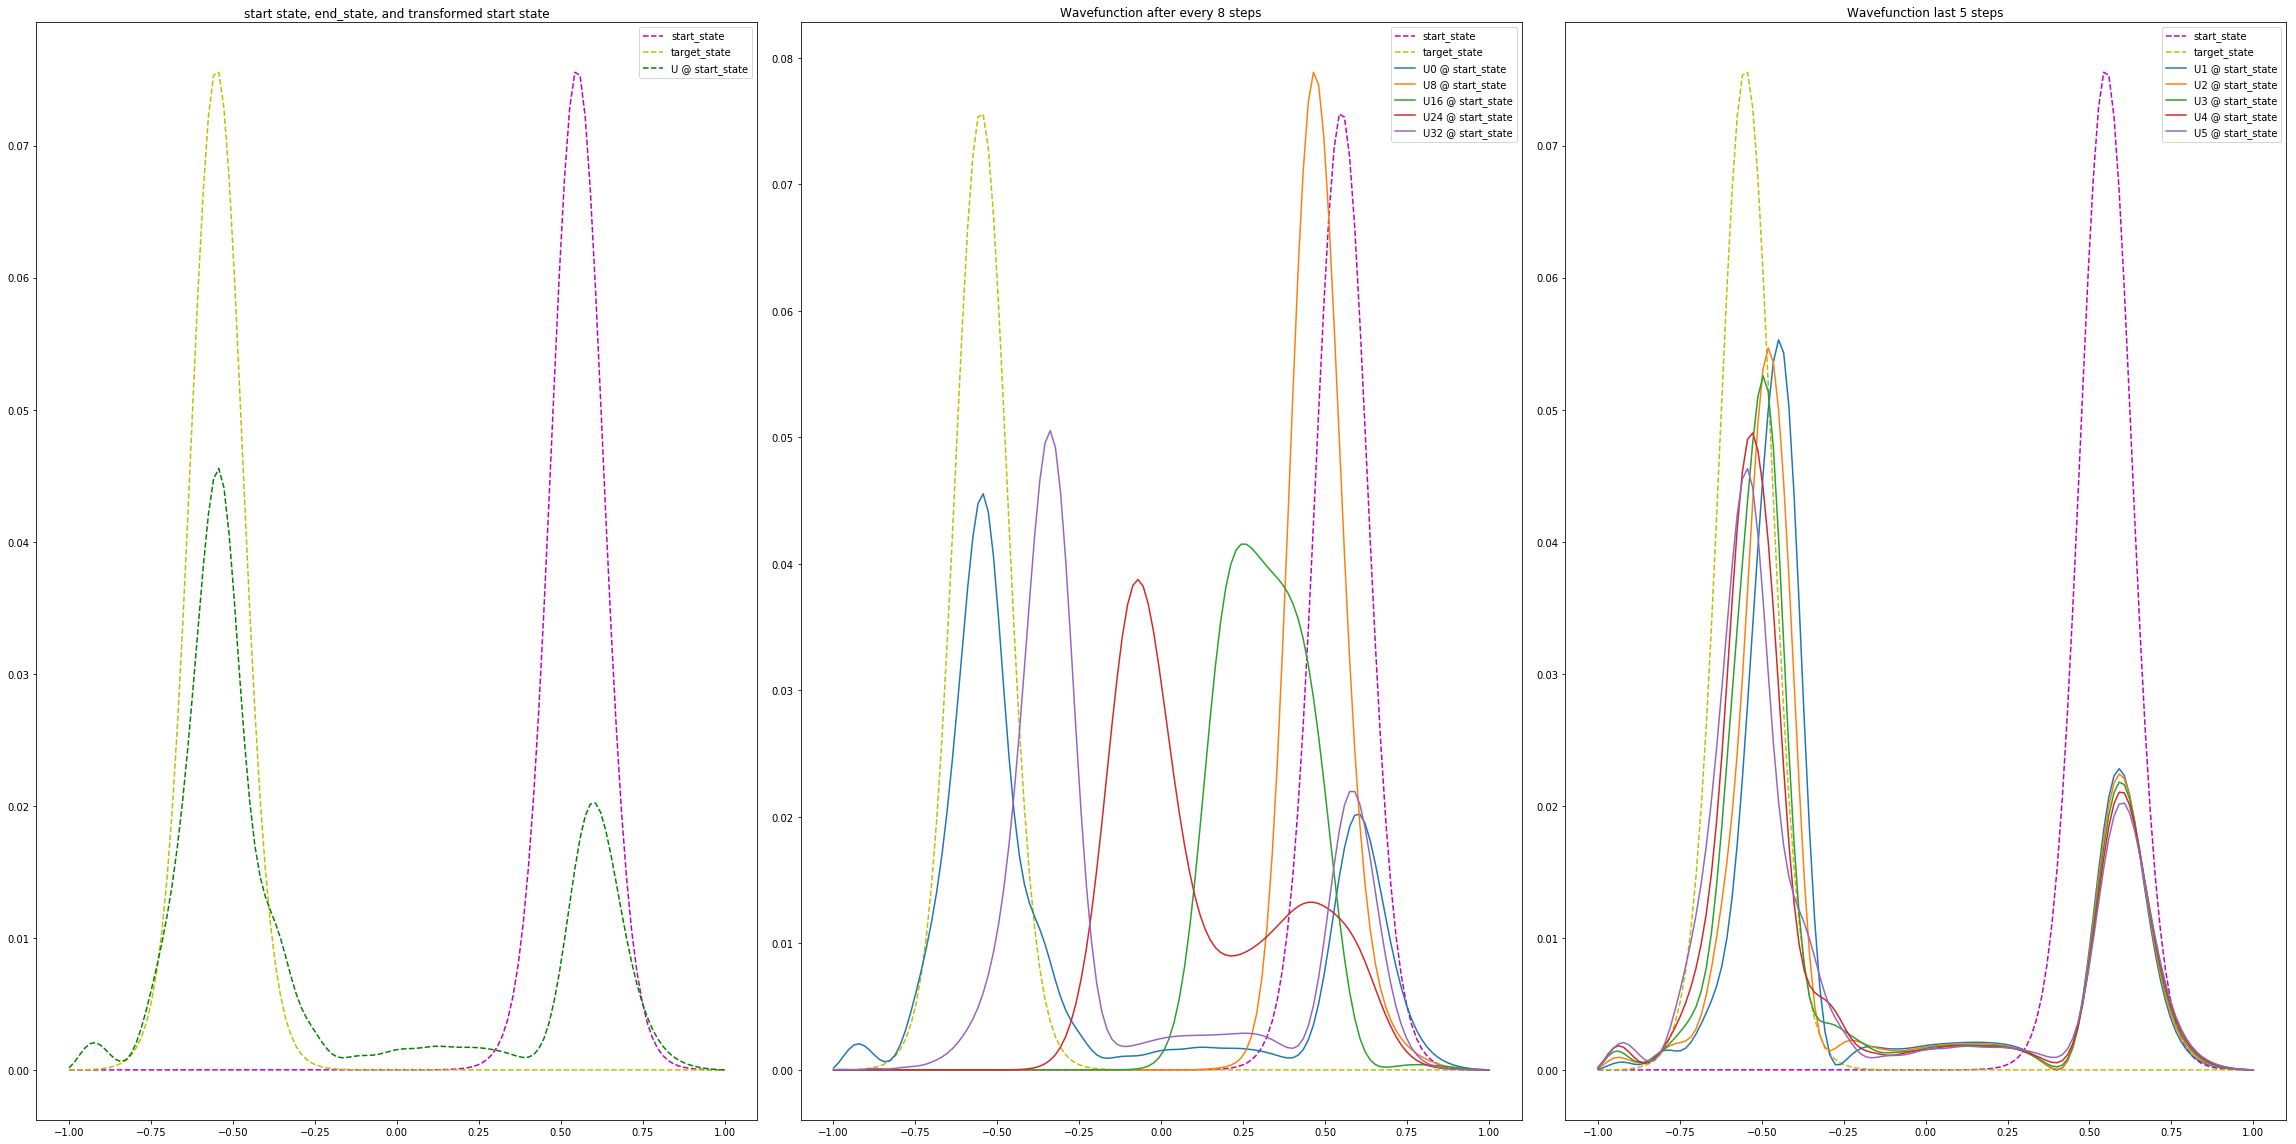

In [38]:
print('Achieved fidelity {0} in {1} iterations'.format(best_score, len(path)))
print('The final protocol: ')
print(protocol)
print('The cost after each iteration')
print(path)
fig, ax = sa.plot_protocol(Q.tweezer_spacing, protocol)
sa.visualize_fidelity(Q, protocol)
plt.show()


# Moving to  a superposition
Below we show that the algorithm can also try to move the atom to superpositions of states
And in the follwing we cell we make the same plot.
Running it several times may give very different results.

In [39]:
Q_super, fids_super, prots_super = sa.superposition(params, 1)

Run {'T': 0.1, 'N': 40, 'tweezer_grid_size': 128, 'hamiltonian_grid_size': 128, 'Alpha': 160, 'Beta': 130, 'fix_start': True, 'superposition': None}
superposition {'T': 0.1, 'N': 40, 'tweezer_grid_size': 128, 'hamiltonian_grid_size': 128, 'Alpha': 160, 'Beta': 130, 'fix_start': True, 'superposition': True}
Time Per Step is: 0.0025
Make hamiltonians - grid size, Alpha:  128 160
Make T matrix for finite difference approximation of p^2: -1 2 -1: Tridiagonal matrix
T Scale: 0.5 / h^2 2016.1250000000002
Make B Matrix exp(-(x - start_state)^2/(2std^2)))
hamiltonians done
Made 128 Hamiltonians
Compute start state vector -  H=p^2/2m - 130 exp(-(x-x_start)^2/2\sigma).
finding smallest eigenvalue (128, 128)
largest eigenvalue 8061.952844798912
Smallest eigenvalues  -90.46769215882159
start_state norm 1.0000000000000002 complex128
Compute target state vector - H=p^2/2m-130 exp(-(x-x_end)^2/2\sigma).
finding smallest eigenvalue (128, 128)
largest eigenvalue 8061.952844798912
Smallest eigenvalues  

actual protocol [-0.55905512  0.43307087  0.4015748   0.37007874  0.33858268  0.30708661
  0.27559055  0.25984252  0.22834646  0.22834646  0.21259843  0.19685039
  0.16535433  0.57480315  0.13385827  0.1023622   0.49606299  0.48031496
  0.43307087 -0.00787402  0.4015748   0.37007874 -0.08661417 -0.11811024
  0.37007874  0.41732283 -0.19685039 -0.21259843 -0.24409449  0.35433071
 -0.27559055 -0.29133858  0.29133858  0.49606299  0.41732283 -0.37007874
 -0.38582677 -0.4015748  -0.4015748  -0.4015748 ]


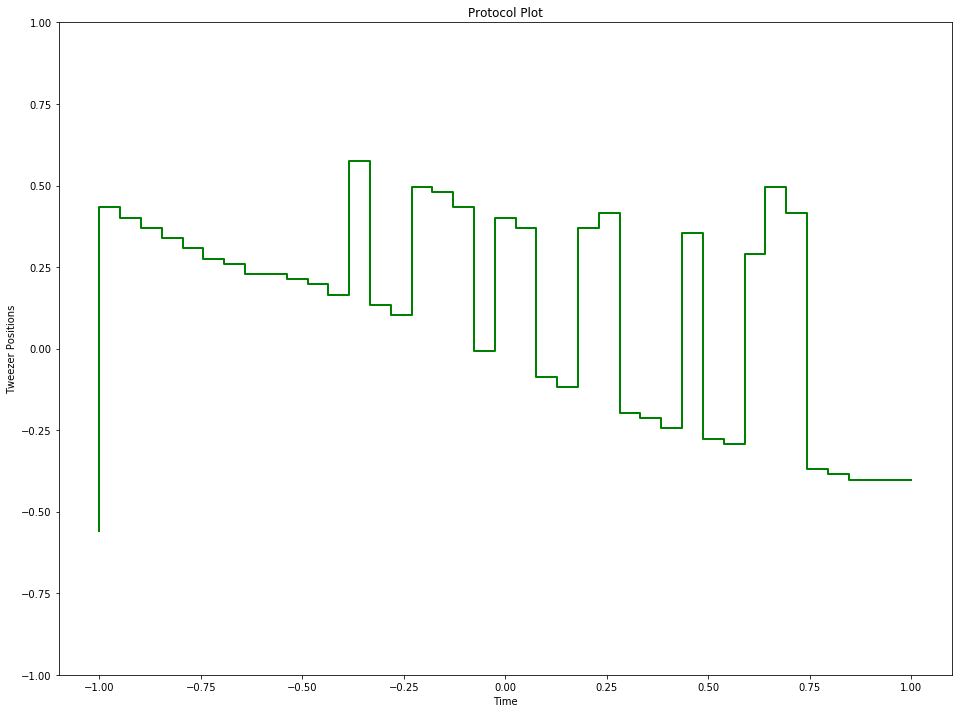

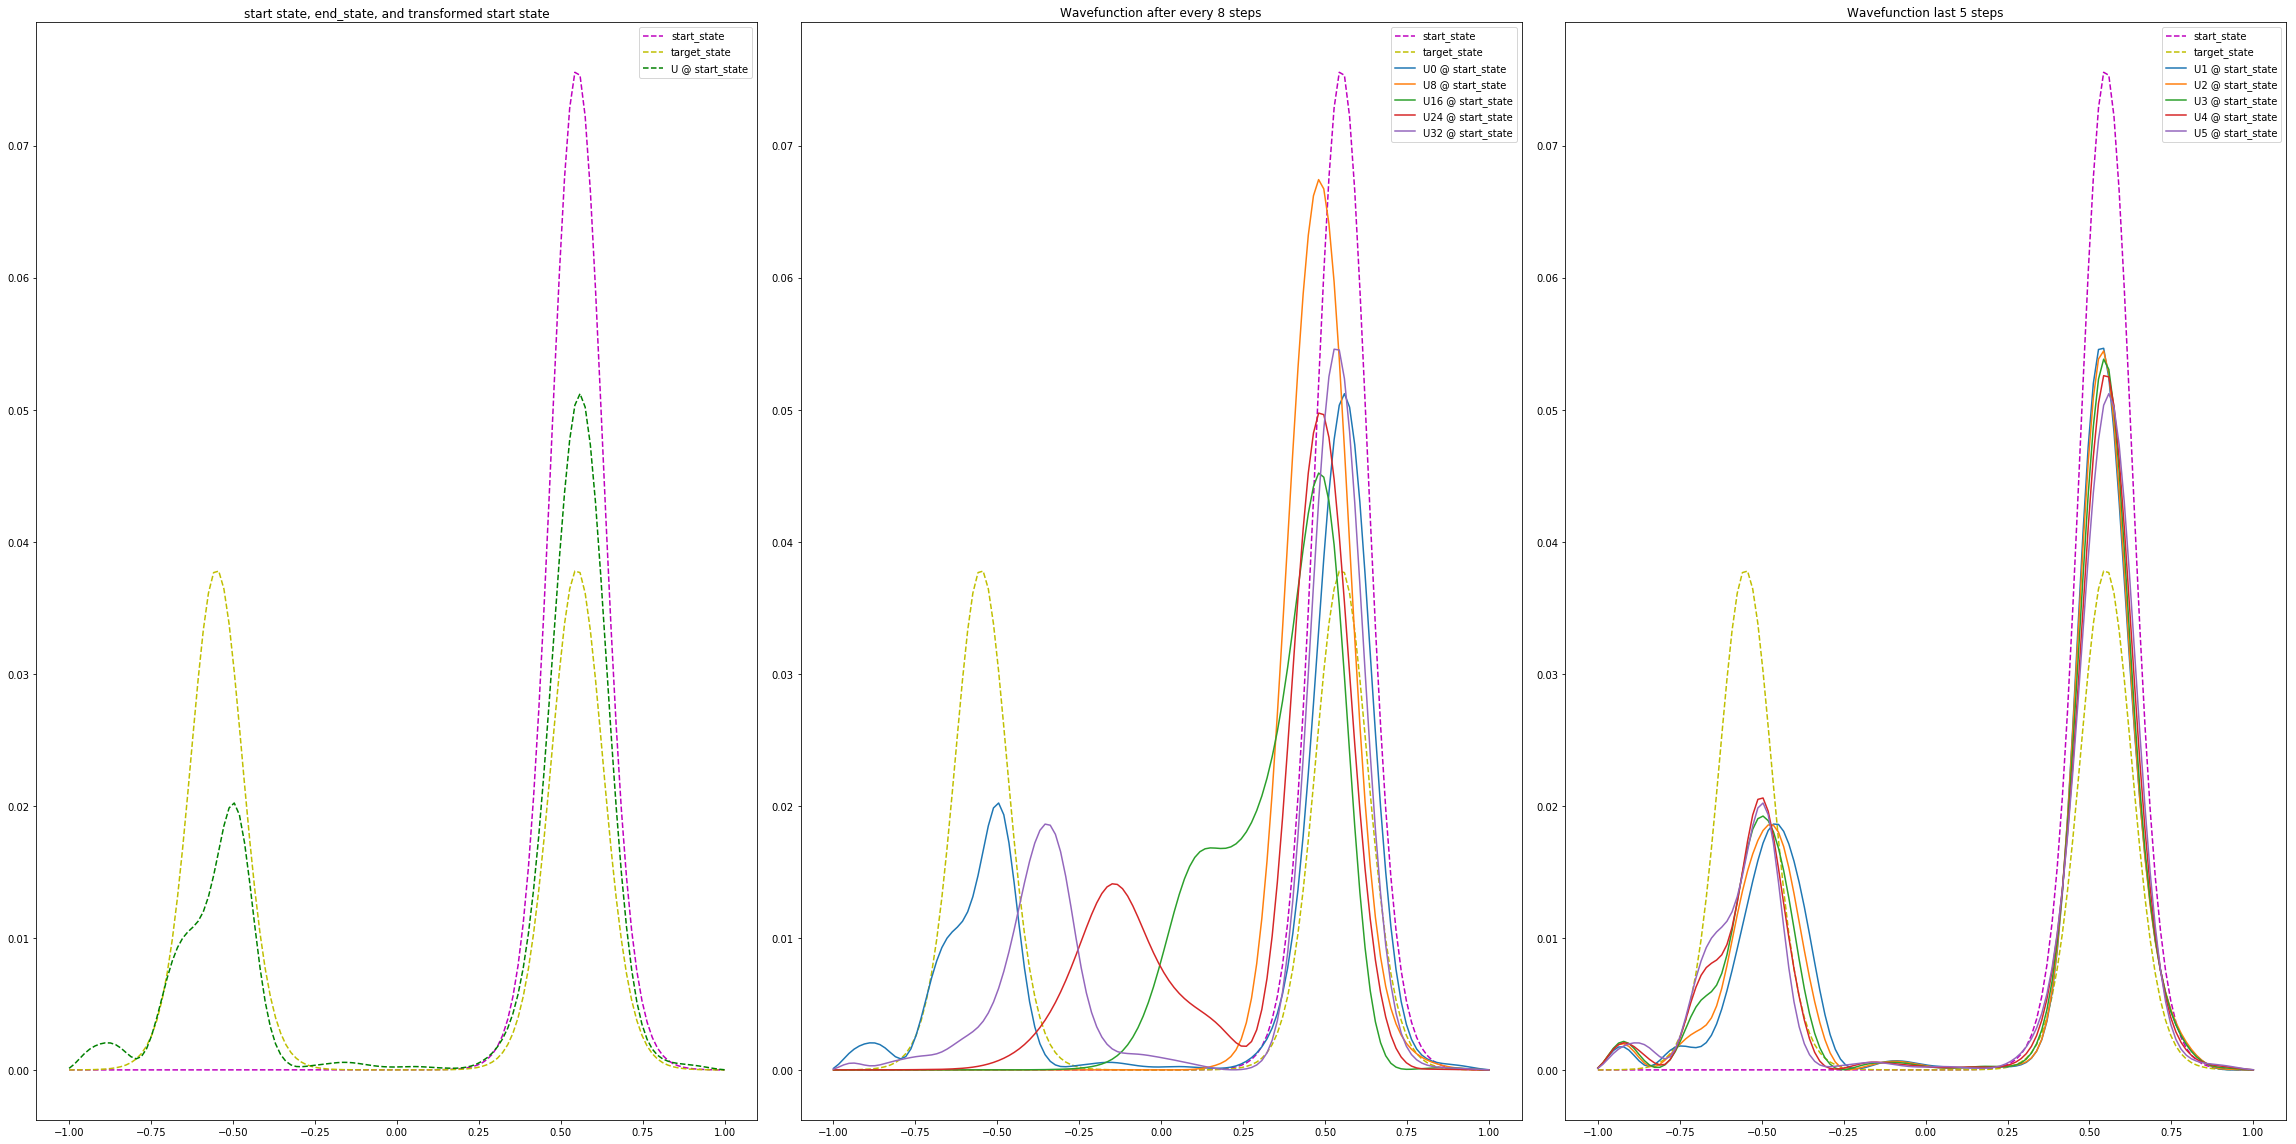

In [40]:
fig, ax = sa.plot_protocol(Q_super.tweezer_spacing, prots_super[0])
sa.visualize_fidelity(Q_super, prots_super[0])
plt.show()


## Adding more amplitudes
We can run Stochastic Ascent allowing more amplitudes if we wish. 
In this case amplitudes of 100,105, ..., 160 are allowed.
Hence the algorithm becomes slower
(Plotting the protocol does not work with plot_protocol that was made to work with the basic approach of using A=160 always)

In [41]:
Q_more, best_score_more, protocol_more  = sa.run_multi_amplitude(params, None)

Run multi amplitude {'T': 0.1, 'N': 40, 'tweezer_grid_size': 128, 'hamiltonian_grid_size': 128, 'Alpha': 160, 'Beta': 130, 'fix_start': True, 'superposition': None}
Time Per Step is: 0.0025
Make hamiltonians - grid size, Alpha:  128 160
Make T matrix for finite difference approximation of p^2: -1 2 -1: Tridiagonal matrix
T Scale: 0.5 / h^2 2016.1250000000002
Make B Matrix exp(-(x - start_state)^2/(2std^2)))
hamiltonians done
Made 128 Hamiltonians
Compute start state vector -  H=p^2/2m - 130 exp(-(x-x_start)^2/2\sigma).
finding smallest eigenvalue (128, 128)
largest eigenvalue 8061.952844798912
Smallest eigenvalues  -90.46769215882159
start_state norm 1.0000000000000002 complex128
Compute target state vector - H=p^2/2m-130 exp(-(x-x_end)^2/2\sigma).
finding smallest eigenvalue (128, 128)
largest eigenvalue 8061.952844798912
Smallest eigenvalues  -90.46769215882796
target_state norm 0.9999999999999999
compute unitaries by eigendecomposition of tridiagoanal matrices
Time to make unitaries